#**ESTADÍSTICA APLICADA**
##*MODELO DE SUPERVIVENCIA SOBRE EL ABANDONO DE EMPLEADOS EN UNA COMPAÑÍA*  

![](https://miro.medium.com/max/1400/1*oRKwlu787m3gjN-wDEKL_g.png)
  
Docente: Jaime Jovanny Escobedo Gonzalez  
Grupo 051

|**EQUIPO**|**MATRICULA**|
|-------|-------|  
|Luis Aldair Hernández Martínez|1616940|
|Grecia Abigaíl Martínez Ambríz|1805217|  

#**INTRODUCCIÓN**  

El asunto que se estudiará en el siguiente modelo de supervivencia es el nivel de abandono de empleados de una compañía, es decir, que tan probable es que un empleado abandone su puesto de trabajo después de un cierto periodo de tiempo, independientemente de los motivos, y por lo tanto reduzca la fuerza laboral de la empresa.  

* **Employee Attrition** es un término en inglés que se utiliza para definir la reducción gradual en el número de empleados de una empresa, esto ocurre cuando el tamaño de su fuerza laboral disminuye con el tiempo. Esto significa que los empleados se van más rápido de lo que son contratados.  

*Evento:* El empleado abandona la compañía independientemente de las razones.  
*Tiempo:* Los meses que pasan desde que el empleado es contratado hasta que se va.

##**CAUSAS**  
![](https://m.vanguardia.com/sites/default/files/imagecache/Noticia_600x400/foto_interna/2017/01/27/web_unnamed_wide_tp.jpg)  
El que una persona decida abandonar su empleo puede ocurrir por varias razones, algunas de ellas son:  
* Inconformidad con los beneficios que recibe y poca remuneración.  
* La falta de oportunidades para desarrollarse profesionalmente.  
* Mala cultura en el lugar de trabajo.  
* Haber encontrado una mejor oportunidad de trabajo.  
* Jubilación  
* Despidos  
* Padecimiento de alguna enfermedad

Si observamos las cosas desde el punto de vista de la compañía, la disminución de fuerza laboral puede deberse a lo siguiente:  
* Los empleados son reemplazados por la automatización o la adopción de nuevas tecnologías.  
* En un mundo donde los conjuntos de habilidades requeridas cambian constantemente, algunas posiciones también se vuelven obsoletas con el tiempo.  
* Falta de contratación, los empleados que se van simplemente no son reemplazados.  
* Falta de personas calificadas en ciertas industrias y geografías.

##**¿POR QUÉ ES IMPORTANTE ESTE ANÁLISIS?**  
La retención de empleados es crucial para el éxito de una empresa y la tasa de desgaste es la métrica que proporciona información sobre qué tan bien está reteniendo a sus empleados.  

Por lo general, los empleadores buscan alcanzar una baja tasa de deserción, ya que significa que sus empleados están satisfechos y no tienen que invertir en la contratación y capacitación de nuevas personas.

Medir y analizar la tasa de deserción de una empresa permite determinar cuántos empleados abandonaron la compañía dentro de un cierto período y comprender por qué se fueron. Esto nos permite desarrollar estrategias de retención efectivas ya que comprender las tendencias y patrones de comportamiento es a menudo el primer paso para reducir el desgaste dentro de la organización.


In [ ]:
pip install lifelines

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [ ]:
attrition = pd.read_csv("https://raw.githubusercontent.com/GreMtz/archivos/main/employee_attrition%20(1).csv")

In [ ]:
#Variables que posee nuestra base de datos
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_projects        14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


|**VARIABLE**|**VALORES**|
|-------|-------|  
|satisfaction_level|[0,1]|
|last_evaluation|[0,1]|
|number_projects|> 0|
|average_montly_hours| > 1|
|time_spend_company| > 1|
|work_accident| Si = 1, No = 0 |
|left| Evento = 1, Dato Censurado = 0 |
|promotion_last_5years| Si = 1, No = 0 |
|department| sales, accounting, hr, technical, support, management, IT,  product_mng, marketing, RandD|
|salary| low, medium, high|




La variable *left* nos indica si el empleado ha dejado la compañía, es decir, nos dice si el evento sucedió. Nuestra base posee datos censurados, esto significa que hay empleados que después de ciertos meses dejarón de actualizar su estatus y no tenemos la certeza de que hayan dejado su trabajo o aún continuen laborando en la organización donde fueron contratados al momento de iniciarse el análisis.

In [ ]:
#Convertiremos las variables categóricas "department" y "salary" a númericas.
var_cat = ['department','salary']

for i in var_cat:
  attrition[i] = attrition[i].astype('category')
  attrition[i] = attrition[i].cat.codes

In [ ]:
#Verificamos si tenemos valores perdidos en nuestra base de datos
attrition.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
#Vemos si hay filas duplicadas en nuestra base de datos
attrition[attrition.duplicated(keep=False)]

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [ ]:
#Procedemos a eliminarlas
attrition.drop_duplicates(inplace=True)

In [ ]:
#Estadísticas Descriptivas
#Primero calculamos la moda
from statistics import mode
moda1 = mode(attrition['satisfaction_level'])
moda2 = mode(attrition['last_evaluation'])
moda3 = mode(attrition['number_projects'])
moda4 = [149,156] #bimodal
moda5 = mode(attrition['time_spend_company'])
moda6 = mode(attrition['work_accident'])
moda7 = mode(attrition['left'])
moda8 = mode(attrition['promotion_last_5years'])

In [ ]:
#Hacemos un arreglo para después agregarlo como fila y del nuevo INDEX
modas = {'satisfaction_level':moda1,'last_evaluation':moda2,'number_projects':moda3,'average_montly_hours':moda4,'time_spend_company':moda5,'work_accident':moda6,'left':moda7,'promotion_last_5years':moda8}
new = ['count', 'mean', 'std','min', '25%','50%','75%','max','mode']

In [ ]:
#Pedimos las estadisticas descriptivas 
descriptivas = attrition.describe()
#Eliminamos las columnas de las variables categoricas
descriptivas = descriptivas.drop(['department','salary'], axis=1)

In [ ]:
#Agregamos la fila de las modas y la columna del INDEX
descriptivas = descriptivas.append(modas, ignore_index=True)
descriptivas['Medidas'] = new

In [ ]:
#Agregamos los nombres del INDEX
descriptivas.set_index('Medidas',inplace = True)

In [ ]:
descriptivas

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
Medidas,,,,,,,,
count,11991.000000,11991.000000,11991.000000,11991.0,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.0,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.0,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.0,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.0,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.0,10.000000,1.000000,1.000000,1.000000
mode,0.740000,0.550000,4.000000,"[149, 156]",3.000000,0.000000,0.000000,0.000000


##**ANÁLISIS DE ESTADÍSTICAS DESCRIPTIVAS**  
El tamaño de muestra es de 11,991 empleados con los que se realizó el modelo de supervivencia.

||**NIVEL DE SATISFACCIÓN**|
|-------|-------|  
|Media| 0.629658 |
|Desviación Estándar|0.241070|
|Mediana| 0.66 |
|Moda| 0.74 |  

* En esta variable cada uno de los empleados dió un porcentaje de que tan satisfecho esta con su puesto de trabajo.  

* En promedio el nivel de satisfacción que tienen los empleados con la compañía es del 62.96%, lo que indica que aunque hay personas que están bastante o medianamente satisfechas, todavía hay aspectos que se pueden mejorar para subir ese nivel.  

* La desviación estándar nos muestra que no hay mucha dispersión entre los datos, esto también puede verse al analizar los cuartiles que nos indica que al menos el 75% de los datos son de porcentajes mayores a 48%.  

* El porcentaje minimo que se recibió fue del 9% y el máximo del 100%.


||**RESULTADO DE LA ULTIMA EVALUACIÓN**|
|-------|-------|  
|Media| 0.716683 |
|Desviación Estándar|0.168343|
|Mediana| 0.72 |
|Moda| 0.55 |  

* Esta variable representa el resultado obtenido en la última evaluación periódica que mide el desempeño y el progreso del empleado, también puede verse como la última revisión de desempeño.  

* El promedio del grupo fue de un 0.7166, la cual no es una mala calificación del todo sin embargo puede mejorarse mucho más. Se tendría que investigar que factores se pueden ajustar para mejorar el desempeño de los empleados.  

* La desviación estándar nos indica que no hay mucha dispersión con respecto a la media y los cuartiles nos indican que al menos el 50% de los datos son de calificaciones mayores o iguales a 0.72.  

* La calificación minima que se obtuvo fue de 0.36 y la máxima de 1.

||**NÚMERO DE PROYECTOS**|
|-------|-------|  
|Media| 3.802852	 |
|Desviación Estándar|1.163238|
|Mediana| 4 |
|Moda| 4 |  

* Esta variable representa el número de proyectos asignados al empleado.
* En promedio a los empleado se les asigno 3.8 proyectos. 
* Tenemos una desviación estándar de 1.16 aproximadamente por lo que no hay mucha dispersión con respecto a la media, de la misma forma podemos ver que el valor de la mediana, moda y media es idéntica, esto nos dice que la mayoria de los datos se concentran alrededor de la media, es decir, a la mayor parte de los empleados se les asignó 4 proyectos durante el análisis.
* El minimo número de proyectos que se le pidió a un empleado fue de 2 y el máximo 7.

||**PROMEDIO DE HORAS TRABAJADAS POR MES**|
|-------|-------|  
|Media| 200.473522 |
|Desviación Estándar|48.727813|
|Mediana| 200 |
|Moda| bimodal: 149 y 156 |  

* Esta variable mide el promedio mensual de horas trabajadas por el empleado.  
* Tenemos un promedio mensual de 200.47 hrs trabajadas aproximadamente.  
* Tenemos una desviación estándar de 48.72 esto parece indicar que si hay bastante dispersión entre los datos con respecto a la media.
* El minimo de horas que un empleado trabajó por mes fue de 96 y el máximo 310.

||**TIEMPO DE PERMANENCIA EN LA COMPAÑÍA**|
|-------|-------|  
|Media| 3.364857 |
|Desviación Estándar|1.330240|
|Mediana|3|
|Moda|3|  

* Esta variable mide el número de meses que el empleado permanenció en la empresa hasta que abandono el puesto o hasta que se dejó de tener seguimiento.  
* Tenemos un promedio de 3.36 meses de permanencia.  
* Tenemos una desviación estándar de 1.33 con respecto a la media por lo que no hay mucha dispersión entre los datos, esto indica que la mayoria de los empleados permanencieron en la empresa alrededor de 3 meses.
* El minimo de meses de permanencia fue de dos meses y el máximo de tres meses.  

*A partir de aquí podríamos empezar a sospechar que la probabilidad de supervivencia es muy poca, es decir, los empleados abandonan la empresa muy rápido a partir del tiempo en el que son contratados y que la compañía tiene problemas para retener a su personal.*

In [ ]:
#Calculamos la desvación estándar con respecto a las proporciones
#Accidente de trabajo
n = attrition.shape[0]  #tamaño de muestra
prop_wa = attrition['work_accident'].mean()
DS_WA = pow((prop_wa*(1-prop_wa))/n,0.5)
DS_WA

0.0032987025112721806

In [ ]:
#Evento
prop_left = attrition['left'].mean()
DS_L = pow((prop_left*(1-prop_left))/n,0.5)
DS_L

0.003398228090533256

In [ ]:
#Ascenso
prop_asc = attrition['promotion_last_5years'].mean()
DS_asc = pow((prop_asc*(1-prop_asc))/n,0.5)
DS_asc

0.0011781076554279264

||**ACCIDENTES DE TRABAJO**|
|-------|-------|  
|Proporción|0.154282|
|Desviación Estándar|0.003298|
|Mediana|0|
|Moda|0|
  
* Representa a una variable binaria que nos dice si el empleado ha sufrido algún accidente de trabajo, donde Sí = 1 y No = 0.
* El estimador nos dice que el 15.42% de los empleados ha sufrido un accidente de trabajo, un porcentaje que es bastante pequeño.  
* Hay una desviación estándar con respecto a la proporción de 0.003298, es decir que hay poca dispersión entre los datos, la mayoría de los empleados no ha sufrido un accidente de trabajo.
  

||**EVENTO**|
|-------|-------|  
|Proporción|0.166041|
|Desviación Estándar|0.003398|
|Mediana|0|
|Moda|0|
  
* Representa al evento de abandonar la compañía, es decir, el porcentaje de empleados que ha dejado su trabajo después de ciertos meses.
* El estimador nos dice que aprox. el 16.6%  de los empleados abandono la compañía antes o al cumplir los 10 meses, que fue el tiempo máximo del que se tuvo registro.  
* Hay una desviación estándar con respecto a la proporción de 0.003398, es decir que hay poca dispersión entre los datos, por lo que la mayor parte de los datos están censurados, no se puede saber con certeza si abandonaron la compañía o aún permanecen en ella.
  

||**ASCENSO EN LOS ÚLTIMOS 5 AÑOS**|
|-------|-------|  
|Proporción|0.016929|
|Desviación Estándar|0.001178|
|Mediana|0|
|Moda|0|
  
* Indica si el empleado fue promovido en los últimos 5 años.
* El estimador nos dice que aprox. el 1.69%  de los empleados fue promovido en los últimos 5 años.  
* Hay una desviación estándar con respecto a la proporción de 0.001178, es decir que hay poca dispersión entre los datos, podemos concluir que muy pocos empleados fueron promovidos en los últimos 5 años.
  

In [ ]:
#ESTADISTICAS DESCRIPTIVAS PARA DEPARTAMENTO Y SALARIO
#DEPARTAMENTO
#Clasificamos los datos
Group01 = attrition[attrition['department']==0]  #IT
Group02 = attrition[attrition['department']==1]  #RandD
Group03 = attrition[attrition['department']==2]  #accounting
Group04 = attrition[attrition['department']==3]  #hr
Group05 = attrition[attrition['department']==4]  #management
Group06 = attrition[attrition['department']==5]  #marketing
Group07 = attrition[attrition['department']==6]  #product_mng
Group08 = attrition[attrition['department']==7]  #sales 
Group09 = attrition[attrition['department']==8]  #support
Group10 = attrition[attrition['department']==9]  #technical

In [ ]:
#Calculamos el tamaño
n1 = Group01.shape[0]
n2 = Group02.shape[0]
n3 = Group03.shape[0]
n4 = Group04.shape[0]
n5 = Group05.shape[0]
n6 = Group06.shape[0]
n7 = Group07.shape[0]
n8 = Group08.shape[0]
n9 = Group09.shape[0]
n10 = Group10.shape[0]

In [ ]:
#Calculamos las proporciones
prop_01 = n1/n
prop_02 = n2/n
prop_03 = n3/n
prop_04 = n4/n
prop_05 = n5/n
prop_06 = n6/n
prop_07 = n7/n
prop_08 = n8/n
prop_09 = n9/n
prop_10 = n10/n

In [ ]:
#Realizamos un DataFrame y lo mostramos
etiquetas = ['IT', 'RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
df = [prop_01,prop_02,prop_03,prop_04,prop_05,prop_06,prop_07,prop_08,prop_09,prop_10]

In [ ]:
department_prop = pd.DataFrame()

In [ ]:
department_prop['Proporciones'] = df
department_prop['Departamento'] = etiquetas
department_prop.set_index('Departamento',inplace = True)

In [ ]:
department_prop

,Proporciones
Departamento,
IT,0.081394
RandD,0.057877
accounting,0.051789
hr,0.050121
management,0.036361
marketing,0.056125
product_mng,0.057210
sales,0.270119
support,0.151864


**DEPARTAMENTOS DE LA EMPRESA**  
Las areas con mayor cantidad de empleados son ventas con 27.01%, technical con 18.71% y el area de soporte con un 15.19%, juntas conllevan el 60.91% de los empleados.


In [ ]:
#SALARIO
#Clasificamos los datos
Group_high = attrition[attrition['salary']==0]  
Group_low = attrition[attrition['salary']==1]  
Group_medium = attrition[attrition['salary']==2]  

In [ ]:
#Calculamos el tamaño
nl = Group_low.shape[0]
nm = Group_medium.shape[0]
nh = Group_high.shape[0]

In [ ]:
#Calculamos las proporciones
prop_low = nl/n
prop_med = nm/n
prop_high = nh/n

In [ ]:
#Realizamos un DataFrame y lo mostramos
etiquetas2 = ['Bajo','Medio','Alto']
df2 = [prop_low,prop_med,prop_high]

In [ ]:
salary_prop = pd.DataFrame()

In [ ]:
salary_prop['Proporciones'] = df2
salary_prop['Salario'] = etiquetas2
salary_prop.set_index('Salario',inplace = True)

In [ ]:
salary_prop

,Proporciones
Salario,
Bajo,0.478692
Medio,0.438746
Alto,0.082562


**SALARIO**  
Aqui se puede observar que el 47.86% de los empleados recibe un salario bajo, y que un 43.87% recibe un salario medio, son muy pocos los que reciben una alta remuneración, con solo un 8.25%

In [ ]:
#Tiempo promedio de sobrevivencia de la base de datos
promedio = attrition['time_spend_company'].mean()
print(f'El tiempo promedio que el empleado permanece en su trabajo hasta que lo abandona es de {round(promedio,2)} meses')

El tiempo promedio que el empleado permanece en su trabajo hasta que lo abandona es de 3.36 meses


In [ ]:
Meses = attrition['time_spend_company']
Estado = attrition['left']

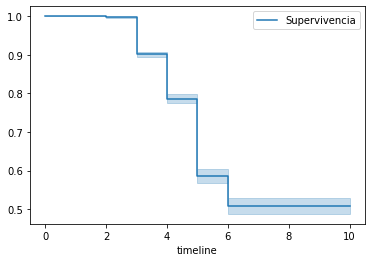

In [ ]:
ax = plt.subplot(111)
ax = kmf.fit(Meses, Estado, label = "Supervivencia").plot(ax=ax)

In [ ]:
kmf.survival_function_

,Supervivencia
timeline,
0.0,1.000000
2.0,0.997415
3.0,0.901419
4.0,0.786743
5.0,0.585677
6.0,0.508203
7.0,0.508203
8.0,0.508203
10.0,0.508203


In [ ]:
kmf.median_survival_time_

inf

La mediana del tiempo de supervivencia representa el punto en el tiempo en el que en promedio el 50% de los empleados se quedan en la compañía.
Con el comando anterior deberiamos obtenerla, sin embargo, en este caso, el comando devuelve *inf*, lo que nos indica que en la curva de supervivencia no  se observa ese punto en nuestros datos.

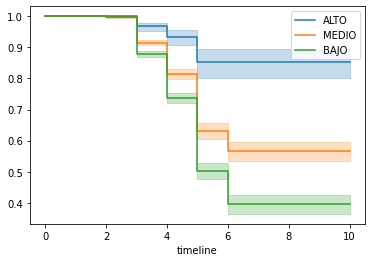

In [ ]:
#Análisis de Supervivencia Conforme al Salario
#Utilizamos los dataframes que ya habiamos separado para calcular la proporción
ax = plt.subplot(111)
ax = kmf.fit(Group_high['time_spend_company'],Group_high['left'], label = "ALTO").plot(ax = ax)
ax = kmf.fit(Group_medium['time_spend_company'],Group_medium['left'], label = "MEDIO").plot(ax = ax)
ax = kmf.fit(Group_low['time_spend_company'],Group_low['left'], label = "BAJO").plot(ax = ax)

In [ ]:
kmf.fit(Group_high['time_spend_company'],Group_high['left'], label = "ALTO")
kmf.survival_function_

,ALTO
timeline,
0.0,1.000000
2.0,1.000000
3.0,0.968579
4.0,0.934540
5.0,0.854272
6.0,0.854272
7.0,0.854272
8.0,0.854272
10.0,0.854272


In [ ]:
kmf.fit(Group_medium['time_spend_company'],Group_medium['left'], label = "MEDIO")
kmf.survival_function_

,MEDIO
timeline,
0.0,1.000000
2.0,0.996389
3.0,0.915086
4.0,0.815701
5.0,0.631175
6.0,0.566041
7.0,0.566041
8.0,0.566041
10.0,0.566041


In [ ]:
kmf.fit(Group_low['time_spend_company'],Group_low['left'], label = "BAJO")
kmf.survival_function_

,BAJO
timeline,
0.0,1.000000
2.0,0.997909
3.0,0.877685
4.0,0.737027
5.0,0.503336
6.0,0.394900
7.0,0.394900
8.0,0.394900
10.0,0.394900


In [ ]:
#Verificamos si las funciones de supervivencia de Alto, Medio, Bajo son iguales o distinas aplicando el long-rank test
from lifelines.statistics import multivariate_logrank_test

In [ ]:
result = multivariate_logrank_test(attrition['time_spend_company'],attrition['salary'],attrition['left'])

**PRUEBA DE LOG-RANK**  
$H_0$ : Las curvas de sobrevivencia son iguales.  
$H_1$ : Las curvas de sobrevivencia son distintas.

In [ ]:
EP = result.test_statistic
print(f'El estadistico de prueba es {round(EP, 2)}')

El estadistico de prueba es 194.64


In [ ]:
pvalor = result.p_value
print(f'El valor del p-valor es {pvalor}')

El valor del p-valor es 5.43858326321036e-43


In [ ]:
result.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         194.64 <0.005    140.40

Tenemos un P-valor < 5% y un estadístico de prueba igual a 194.64, lo que es estadisticamente significativo, por lo que tenemos suficiente evidencia para rechazar la hipótesis nula y conlcuir que nuestras funciones de supervivencia son distintas.  

Esto nos da una fuerte evidencia de que la remuneración que recibe un empleado influye significativamente en que este permanezca la empresa.  

## **MODELO DE COX**

In [ ]:
from lifelines import CoxPHFitterm

In [ ]:
cph = CoxPHFitter()

In [ ]:
cph.fit(attrition, duration_col = 'time_spend_company', event_col = 'left')

<lifelines.CoxPHFitter: fitted with 11991 total observations, 10000 right-censored observations>

In [ ]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 11991 total observations, 10000 right-censored observations>
             duration col = 'time_spend_company'
                event col = 'left'
      baseline estimation = breslow
   number of observations = 11991
number of events observed = 1991
   partial log-likelihood = -15996.31
         time fit was run = 2022-05-23 20:42:51 UTC

---
                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                     
satisfaction_level     -2.44       0.09       0.09            -2.61            -2.26                 0.07                 0.10
last_evaluation        -0.04       0.96       0.14            -0.31             0.23                 0.73                 1.26
number_projects        -0.29       0.75       0.02            -0.33            -0.25                 0.72                 0.78
average_montly_hours    0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
work_accident          -1.21       0.30       0.10            -1.41            -1.02                 0.24                 0.36
promotion_last_5years  -1.65       0.19       0.35            -2.35            -0.96                 0.10                 0.38
department              0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
salary                  0.01       1.01       0.04            -0.06             0.08                 0.94                 1.08

                        cmp to      z      p   -log2(p)
covariate                                              
satisfaction_level        0.00 -26.96 <0.005     529.30
last_evaluation           0.00  -0.28   0.78       0.36
number_projects           0.00 -14.82 <0.005     162.60
average_montly_hours      0.00   3.88 <0.005      13.23
work_accident             0.00 -12.07 <0.005     109.06
promotion_last_5years     0.00  -4.66 <0.005      18.28
department                0.00   3.51 <0.005      11.11
salary                    0.00   0.21   0.83       0.27
---
Concordance = 0.85
Partial AIC = 32008.62
log-likelihood ratio test = 1136.43 on 8 df
-log2(p) of ll-ratio test = 794.89

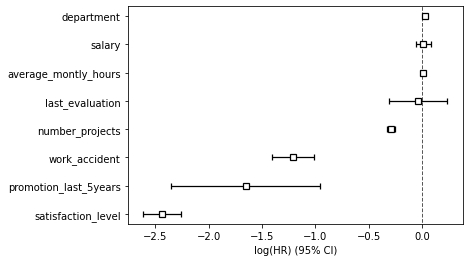

In [ ]:
cph.plot() 

##**INTERPRETACIÓN**

|**VARIABLE**|**P-VALOR**|**COEFICIENTE**|**APORTACIÓN**|
|-------|-------|-------|-------|
|satisfaction_level|<0.005|-2.44|Significativa. El nivel de satisfacción disminuye el riesgo de abandonar la compañía|
|last_evaluation|0.78|-0.04|No significativa|
|number_projects|<0.005|-0.29|Significativa. El número de proyectos disminuye el riesgo de abandonar la compañía|
|average_montly_hours|<0.005|0.00|Significativa. El promedio de horas trabajadas por mes aumenta el riesgo de abandonar la compañía|
|work_accident|<0.005|-1.21|Significativa. El sufrir un accidente de trabajo afecta en el riesgo de abandonar la compañía| 
|promotion_last_5years|<0.005|-1.65|Significativa. Haber sido promovido en los últimos 5 años disminuye el riesgo de abandonar la compañía|
|department|<0.005|0.03|Significativa. El departamento en el que se trabaja puede aumentar el riesgo de abandonar la compañia|
|salary|0.83|0.01|No significativa|

##**RECOMENDACIONES**  
La empresa podría evitar la rotación del personal aumentado su nivel de satisfacción siguiendo algunas recomendaciones:  
* **Asegurar los beneficios adecuados para los empleados:** Seguro de enfermedad, tiempo libre pagado, seguro de invalidez y de vida, opciones de trabajo flexibles.  
* Ofrecer programas de capacitación y desarrollo.
* Asegurar el reconocimiento de los empleados.
* Mejorar la cultura en el lugar de trabajo.  
* Ofrecer mejores remuneraciones.

#**LIMITACIONES DE LOS MODELOS**
Una de las limitaciones de la estimación de Kaplan Meier es que no se puede utilizar para el análisis multivariado, ya que solo estudia el efecto de un factor en el tiempo, otra es que no puede acomodar las variables dependientes del tiempo. Tampoco se puede predecir la estimación adecuada de la magnitud del cambio en el evento.  

El Modelo de Cox también tiene sus desventajes entre ellas es que supone que la tasa de riesgo es constante a lo largo del tiempo,es decir, la proporcionalidad de los riesgos de un caso a otro no debe variar en función del tiempo. El último supuesto se conoce como el supuesto de proporcionalidad de los riesgos.
